In [1]:
# You must run this cell, but you can ignore its contents.
import hashlib

def ads_hash(ty):
    """Return a unique string for input"""
    ty_str = str(ty).encode()
    m = hashlib.sha256()
    m.update(ty_str)
    return m.hexdigest()[:10]

In [2]:
# You must also run this cell.
import matplotlib.pyplot as plt

# Flow control - `for` loops with `range(n)`

Remember from the previous exercise you defined a function like this:

```python
def simulate_generation(a,Rt):
    previous = a[-1]
    new_infected = previous*Rt
    a.append(new_infected)
```

This implements a single new generation using the basic formula for reproduction:

$N_{t+1} = R_t N_t$

Now, consider this code:

```python
x = [1]
for i in range(5):
    simulate_generation(x, 2)
```

When run, `x` will have a value of `[1, 2, 4, 8, 16, 32]`.

## Q1

Write a function called `simulate_n_generations` which takes two arguments, `n` and `Rt`. The first argument `n` will be the number of generations to simulate. The second argument, `Rt` is as above. Your function should return the number of infected individuals, starting from a single individual, after `n` generations.

The function signature should look like this:

```python
def simulate_n_generations(n,Rt):
```

If you run your new function like this:

```python
simulate_n_generations(10, 2)
```

the result should be `[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]`.

Hint: copy the `simulate_generation` function definiton from above and use it.

In [3]:
def simulate_generation(a,Rt):
    previous = a[-1]
    new_infected = previous*Rt
    a.append(new_infected)
    
def simulate_n_generations(n,Rt):
    a = [1]
    for i in range(n):
        simulate_generation(a,Rt)
    return a

In [4]:
# If this runs without error, it means the answer in your previous cell was correct.

assert ads_hash(simulate_n_generations(10, 2)) == 'a9ad958975'
assert ads_hash(simulate_n_generations(9, 3)) == '1f0b039679'

## Q2

Recall that 

- `range(n)` returns an *iterator* starting at `0` and ending at `n`.
- `range(start, end)` returns an iterator starting at `start` and ending before `end`.
- `range(start, end, inc)` returns an iterator starting at `start` and ending before `end` with an increment of `inc`.

Thus, this code

```python
x = []
for i in range(10, 1000, 203):
    x.append(i)
```

Will set `x` equal to `[10, 213, 416, 619, 822]`

Create a list named `my_list` which starts at 10, ends before 1000 and has an increment of 21.

In [5]:
my_list = []
for i in range(10, 1000, 21):
    my_list.append(i)

In [6]:
# If this runs without error, it means the answer in your previous cell was correct.

assert ads_hash(my_list)=='c25a617fa9'

# Flow control - for loops that iterate through a list

Remember that `for` loops will *iterate* through any *iterator*, and lists are iterators.

Therefore this

```python
cumulative = 0
for x in [1,2,3,100]:
    cumulative = cumulative + x
```

sets `cumulative` to 106.

## Q1

Create a function `cum_sum` which takes a single argument `x`. `x` will be an iterator and your function should return the sum of all values in the iterator.

The function signature is:

```python
def cum_sum(x):
```

In [7]:
def cum_sum(x):
    cum = 0
    for i in x:
        cum = cum + i
    return cum

In [8]:
# If this runs without error, it means the answer in your previous cell was correct.

assert ads_hash(cum_sum([1,3,3,451,34,2,3]))=='dcb5d6e69e'
assert ads_hash(cum_sum([1,3,3,-12,32,1,3]))=='eb1e33e8a8'

## Practice with functions

### Q1 Make a function `compute_seq2(n)` which computes the a sequence of length `n` according to the following pattern:

`2, 2, 4, 6, 10, 16, 26 ...`

Hint: this is a Fibonacci sequence with initial elements 2.

In [9]:
def compute_seq2(n):
    if n == 1:
        return [2]
    elif n == 2:
        return [2,2]
    else:
        result = compute_seq2(n-1)
        a = result[-2]
        b = result[-1]
        result.append(a+b)
        return result

In [10]:
# If this runs without error, it means `compute_seq2()` behaves correctly.
assert compute_seq2(16)==[2, 2, 4, 6, 10, 16, 26, 42, 68, 110, 178, 288, 466, 754, 1220, 1974]

### Q2 Make a function `compute_seq3(n)` which computes the a sequence of length `n` according to the following pattern:

`1, 1, 1, 2, 3, 4, 6, 9, 13, 19, 28, ...`

Hint: this is very similar to the Fibonacci sequence, but each element at index `n` is the sum of the elements at index `n-1` and `n-3`. The first three elements are `1`.

In [11]:
def compute_seq3(n):
    assert type(n)==int
    assert n > 0
    if n == 1:
        return [1]
    elif n == 2:
        return [1,1]
    elif n == 3:
        return [1,1,1]
    else:
        result = compute_seq3(n-1)
        a = result[-3]
        b = result[-1]
        result.append(a+b)
        return result

In [12]:
# If this runs without error, it means `compute_seq1()` behaves correctly.
assert compute_seq3(16)==[1, 1, 1, 2, 3, 4, 6, 9, 13, 19, 28, 41, 60, 88, 129, 189]
assert ads_hash(compute_seq3(30)) == '210bfe49ef'

## Practice converting types and using loops

You are a biologist at Cape Verde to study one of the most important nesting sites for loggerhead sea turtles. You are studying the numbers and sexes of young turtles as they hatch. During the data collection part of your project, you have taken notes by typing "m" for male and "f" for female.

In [13]:
# Here are your data.

nest1 = "fffffmmmfmmfffmfmmmfffffffmmffmmfffmmmmffmmffmmmfmmmffmmmmffffmmmfffmffmfmfmfmmffmfmmffmfmmf"
nest2 = "mmmfmffffmmmfmmfmfmmffmffmfmfmffmffmmmfmfffmfmfffmffmmfmfmfmmffmfmmf"
nest3 = "ffffffmmmfmmfffmfmmmffmfmmmfffmmfffmffffmffmmmffffffmmmfmmfffmfmmmffmfmm"
nest4 = "fmfmfmmffmffmfmffffffmfmfmffmffmfmfmmfffffmfmfmmffmffmfmmmfmmmmmmfmfmmm"

A string (`str` in Python) is a *sequence* which can be *iterated*, as in a for loop. You also know the `range` and `list` types, which can also be iterated. When you iterate over an `str`, each item is a signle character `str`:

In [14]:
count = 0
for char in nest1:
    assert type(char)==str
    count = count + 1

In [15]:
count

92

## Q3 How many male turtles are in nest1? Count the number of `"m"` characters are in the `nest` string. Put the answer in a variable `num_males`.

In [16]:
num_males = 0
for char in nest1:
    assert type(char)==str
    if char=='m':
        num_males = num_males + 1
    else:
        assert char=='f'

In [17]:
num_males

44

In [18]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(num_males)=='71ee45a3c0'

## Q4 What fraction of all turtles from nest1 are male? Put the answer in a variable `sex_ratio`.

In [19]:
sex_ratio=num_males / len(nest1)

In [20]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(round(sex_ratio*1000))=='200dd69b70'

## Q5 Create an empty dict called `empty_observations` with keys 'nest1', 'nest2', 'nest3', 'nest4'. Each value should be an empty list.

In [21]:
empty_observations = {'nest1':[],'nest2':[],'nest3':[],'nest4':[]}

In [22]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(tuple([item for item in empty_observations.items()]))=='5c604a4cc5'

## Q6 Create a dict called `observations` with keys 'nest1', 'nest2', 'nest3', 'nest4'. The values for each key should be as given above in the section just after "Here are your data."

The key 'nest1' should have value given above for the `nest1` variable (i.e. `"fffffmmmfmmfffmfmmmfffffffmmffmmfffmmmmffmmffmmmfmmmffmmmmffffmmmfffmffmfmfmfmmffmfmmffmfmmf"`)

In [23]:
observations = {'nest1': "fffffmmmfmmfffmfmmmfffffffmmffmmfffmmmmffmmffmmmfmmmffmmmmffffmmmfffmffmfmfmfmmffmfmmffmfmmf",
'nest2': "mmmfmffffmmmfmmfmfmmffmffmfmfmffmffmmmfmfffmfmfffmffmmfmfmfmmffmfmmf",
'nest3': "ffffffmmmfmmfffmfmmmffmfmmmfffmmfffmffffmffmmmffffffmmmfmmfffmfmmmffmfmm",
'nest4': "fmfmfmmffmffmfmffffffmfmfmffmffmfmfmmfffffmfmfmmffmffmfmmmfmmmmmmfmfmmm",}

In [24]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(tuple([item for item in observations.items()]))=='19ea06edbc'

## Iterating through a `dict`

Consider the following:

In [25]:
data = {'a': 1, 'b': 2, 'c': 3}

In [26]:
for key in data:
    value = data[key]
    print(f"key: {key}, value: {value}")

key: a, value: 1
key: b, value: 2
key: c, value: 3


We see in the above that we can iterate through this dictionary. Let's create a new dictionary based on the first one:

In [27]:
squared_data = {}
for key in data:
    value = data[key]
    squared_data[key] = value*value
print(squared_data)

{'a': 1, 'b': 4, 'c': 9}


## Q7. Putting things together: create a dict called `sex_ratios`.

There should be key for every key from the `observations` dictionary and the value for each key should be the sex ratio for each value in the `observations` dictionary.

In [28]:
def calc_sex_ratio(x):
    num_males = 0
    for c in x:
        if c == 'm':
            num_males = num_males + 1
        else:
            assert c=='f'
    return num_males/len(x)

sex_ratios = {}
for nest in observations:
    sex_ratios[nest] = calc_sex_ratio(observations[nest])

In [29]:
sex_ratios

{'nest1': 0.4782608695652174,
 'nest2': 0.4852941176470588,
 'nest3': 0.4444444444444444,
 'nest4': 0.4788732394366197}

In [30]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(tuple([(k,round(v*10000)) for (k,v) in sex_ratios.items()]))=='9d19a5431a'

## Q8. Plotting data

Given the following data, make a plot that looks like the following:

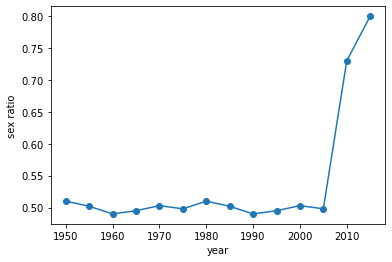

```
year= [1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
sex_ratio = [0.51, 0.502, 0.49, 0.495, 0.503, 0.498, 0.51, 0.502, 0.49, 0.495, 0.503, 0.498, 0.73, 0.80]
```

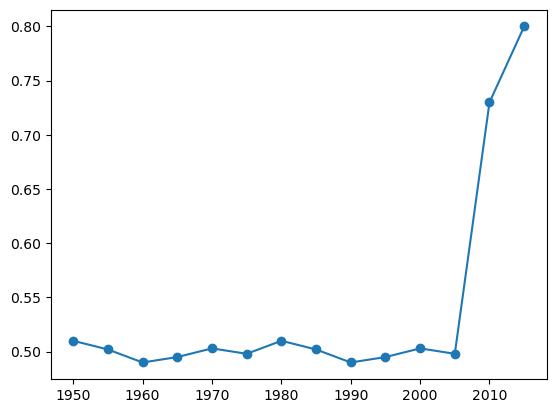

In [31]:
year= [1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
sex_ratio = [0.51, 0.502, 0.49, 0.495, 0.503, 0.498, 0.51, 0.502, 0.49, 0.495, 0.503, 0.498, 0.73, 0.80]
plt.plot(year,sex_ratio,'o-');

# Read more about this topic

While the above "data" in this notebook are completely fake, it was inspired by the paper [here](https://www.int-res.com/abstracts/meps/v621/p209-219), which was covered in the press [here](https://www.washingtonpost.com/world/africa/the-warming-climate-is-turning-baby-sea-turtles-one-gender/2019/10/21/d571f3fe-e3a6-11e9-b0a6-3d03721b85ef_story.html).

# --------

# Working with the Iris data set using for loops

In [32]:
iris_dataset = {'sepal length (cm)': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], 'sepal width (cm)': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0], 'petal length (cm)': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1], 'petal width (cm)': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8], 'species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']}

## Q9 Compute the average value for each measurement for each species.

Put the results in a dict `average_by_species` with the following structure:

```
{'setosa': {'sepal length (cm)': 5.005999999999999,
            'sepal width (cm)': 3.428000000000001},
 'versicolor': {'sepal length (cm)': 5.936}}
```

In total, there should be 3 keys at the top level (the species names) with each value a new dictionary. Each of these per-species dictionaries will have 4 keys - the measurement names. Finally, the value of the per-species dictionaries will be the average value of that measurement.

The example dictionary above is correct but incomplete. There are many keys, and their values, that are missing.

Hint: use the code from the lecture. This will require substantially more code than the previous answers.

You may also want to use a function like this to compute an average:

```python
def compute_average(my_list):
    sum = 0.0
    for item in my_list:
        sum = sum + item
    average = sum / len(my_list)
    return average
```

In [33]:
def compute_average(my_list):
    sum = 0.0
    for item in my_list:
        sum = sum + item
    average = sum / len(my_list)
    return average

rows_for_species = {'setosa':[], 'versicolor':[], 'virginica':[]}
for species_name in rows_for_species:
    row_index = 0
    for row_species in iris_dataset['species']:
        if row_species == species_name:
            rows_for_species[species_name].append(row_index)
        row_index = row_index + 1

average_by_species = {}
for species_name in rows_for_species:
    species_indexes = rows_for_species[species_name]
    average_by_species[species_name] = {}
    for column_name in iris_dataset:
        if column_name=='species':
            continue
        all_rows_for_this_column = iris_dataset[column_name]
        species_values = []
        for species_index in species_indexes:
            row_value = all_rows_for_this_column[species_index]
            species_values.append(row_value)
        species_average = compute_average(species_values)
#         print(f"{species_name} average {column_name}: {species_average}")
        average_by_species[species_name][column_name] = species_average
        
average_by_species

{'setosa': {'sepal length (cm)': 5.005999999999999,
  'sepal width (cm)': 3.428000000000001,
  'petal length (cm)': 1.4620000000000002,
  'petal width (cm)': 0.2459999999999999},
 'versicolor': {'sepal length (cm)': 5.936,
  'sepal width (cm)': 2.7700000000000005,
  'petal length (cm)': 4.26,
  'petal width (cm)': 1.3259999999999998},
 'virginica': {'sepal length (cm)': 6.587999999999998,
  'sepal width (cm)': 2.9739999999999998,
  'petal length (cm)': 5.552,
  'petal width (cm)': 2.026}}

In [34]:
# If this runs without error, it means the answer in your previous cell was correct.

assert type(average_by_species) == dict
assert len(average_by_species.keys())==3
for species in average_by_species:
    species_dict = average_by_species[species]
    assert type(species_dict) == dict
    assert len(species_dict.keys())==4
    for meas in species_dict:
        meas_val = species_dict[meas]
        assert type(meas_val) == float
        
intdict = {'setosa': {'sepal length (cm)': 500, 'sepal width (cm)': 342, 'petal length (cm)': 146, 'petal width (cm)': 24}, 'versicolor': {'sepal length (cm)': 593, 'sepal width (cm)': 277, 'petal length (cm)': 426, 'petal width (cm)': 132}, 'virginica': {'sepal length (cm)': 658, 'sepal width (cm)': 297, 'petal length (cm)': 555, 'petal width (cm)': 202}}

for species in ['setosa', 'versicolor', 'virginica']:
    for meas in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
        assert intdict[species][meas] == int(average_by_species[species][meas]*100)        